In [4]:
# 车质网数据爬取
import requests
from bs4 import BeautifulSoup
import pandas as pd
import bs4

# 请求URL
def get_page_content(request_url):
    #url = 'http://www.12365auto.com/zlts/0-0-0-0-0-0_0-0-0-0-0-0-0-1.shtml'
    # 得到页面的内容
    #User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36
    headers={'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36'}
    html=requests.get(request_url,headers,timeout=10)
    content = html.text
    soup = BeautifulSoup(content, 'html.parser')
    return soup

# 通过content创建BeautifulSoup对象, from_encoding='utf-8'
#soup = BeautifulSoup(content, 'html.parser')

#获取当前页面的投诉
def analysis(soup):
    #定位元素
    # 找到完整的投诉信息框
    temp = soup.find('div',class_="tslb_b")
    #print(type(temp))
    # tr是行标签，td是列标签
    tr_list = temp.find_all('tr')
    # 创建DataFrame存储数据
    df = pd.DataFrame(columns = ['car_id', 'brand', 'car_model', 'car_type', 'desc', 'problem', 'datetime', 'status'])
    #循环获取每行信息
    for tr in tr_list:
        # ToDo：提取汽车投诉信息
        temp = {}
        td_list = tr.find_all('td')
        if len(td_list) > 0:
            car_id, brand, car_model, car_type, desc, problem, datetime, status = td_list[0].text,td_list[1].text,td_list[2].text,td_list[3].text,td_list[4].text,td_list[5].text,td_list[6].text,td_list[7].text
            #不能直接把变量赋值给df[],而是先组装成字典，然后把字典添加到dataframe里
            temp['car_id'],temp['brand'],temp['car_model'],temp['car_type'],temp['desc'],temp['problem'],temp['datetime'],temp['status'] = car_id, brand, car_model, car_type, desc, problem, datetime, status
            df = df.append(temp,ignore_index = True)   #此处必须进行赋值，如果只是append不进行赋值，则数据并未发生变化，要重新存起来
    return df

# df = analysis(soup)
# print(df)

#获取多页的内容
def get_page(page_num):
    base_url =  'http://www.12365auto.com/zlts/0-0-0-0-0-0_0-0-0-0-0-0-0-'
    result = pd.DataFrame(columns = ['car_id', 'brand', 'car_model', 'car_type', 'desc', 'problem', 'datetime', 'status'])
    for i in range(page_num):
        request_url = base_url + str(i+1) + 'shtml'  #url一定要copy正确，这次因为url错误搞了好久
        soup = get_page_content(request_url)
        df = analysis(soup)
        result = result.append(df)
    return result

#调用函数
df = get_page(20)
print(df.head())
#保存获取的数据
df.to_csv(r'H:\SVW-Data analysis PPT\scrapy_data\complaint_1.csv',index = False)

   car_id    brand car_model                         car_type  \
0  492821  一汽-大众奥迪     奥迪A4L  2019款 45 TFSI quattro 个性运动版 国VI   
1  492819     长城汽车      哈弗F5                   2018款 1.5T i潮版   
2  492815     吉利汽车        博越             2016款 2.0L 手动 两驱 智联型   
3  492814     广汽本田        飞度             2014款 1.5L CVT LX舒适型   
4  492813     广汽本田        飞度          2007款 飞度型动派 1.5 CVT 舒适版   

                   desc     problem    datetime status  
0    奥迪A4L变速箱阀体损坏不予更换总成        B84,  2020-07-07   信息审核  
1    哈弗F5中控屏幕死机4S店拖延不处理  H134,I295,  2020-07-07   信息审核  
2     吉利博越换挡时变速箱异响 刹车抖动   B33,E111,  2020-07-07   信息审核  
3      广汽本田飞度启动困难希望尽快处理        A44,  2020-07-07   信息审核  
4  广汽本田飞度变速箱顿挫 异响影响正常行驶    B33,B19,  2020-07-07   信息审核  


In [54]:
#代码过程理解-标签
headers={'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36'}
html=requests.get(request_url,headers,timeout=10)
content = html.text
soup = BeautifulSoup(content, 'html.parser')

temp = soup.find('div',class_="tslb_b")  #class_属性="tslb_b"的div标签的所有子标签
#print(type(temp))
# tr是行标签，td是列标签
tr_list = temp.find_all('tr')
print(tr_list)  #tr_list的一个元素：即一行的所有td标签：<tr><th width="57">投诉编号</th><th width="91">投诉品牌</th><th width="91">投诉车系</th><th width="174">投诉车型</th><th width="166">问题简述</th><th width="233">典型问题</th><th width="93">投诉时间</th><th width="86">投诉状态</th></tr>,

for tr in tr_list:
        # ToDo：提取汽车投诉信息
        temp = {}
        td_list = tr.find_all('td')  #td_list的一个元素：即一行的一个td标签：<tr><th width="57">投诉编号</th><th width="91">
        status = td_list[7].text  #td_list[7]这个标签里的文本内容赋值给status

[<tr><th width="57">投诉编号</th><th width="91">投诉品牌</th><th width="91">投诉车系</th><th width="174">投诉车型</th><th width="166">问题简述</th><th width="233">典型问题</th><th width="93">投诉时间</th><th width="86">投诉状态</th></tr>, <tr><td>486650</td><td>吉利汽车</td><td bid="172" fw="" mid="38470" sid="2527">星越</td><td>2019款 350T 耀星者</td><td class="tsjs"><a href="http://www.12365auto.com/zlts/20200621/486650.shtml" target="_blank">吉利星越车机系统黑屏版本与宣传不符</a></td><td class="tsgztj">H155,M279,</td><td>2020-06-21</td><td><img src="/images/cjhf.jpg" title="处理反馈"/><em>处理反馈</em></td></tr>, <tr><td>486648</td><td>吉利汽车</td><td bid="172" fw="" mid="41694" sid="1892">博越</td><td>2020款 1.8TD DCT 智领PRO</td><td class="tsjs"><a href="http://www.12365auto.com/zlts/20200621/486648.shtml" target="_blank">吉利博越雾灯以及挡位灯与宣传不符</a></td><td class="tsgztj">Q350,</td><td>2020-06-21</td><td><img src="/images/mypf.jpg" title="用户评分"/><em>用户评分</em></td></tr>, <tr><td>486643</td><td>吉利汽车</td><td bid="172" fw="" mid="41694" sid="1892">博越</td><td>2020款 

## 京东海马评论数据爬取

In [1]:
#参考资料：https://blog.csdn.net/qq_34696236/article/details/80511940   （注意，不能完全照抄，要理解每一步，比如url和jason文件格式转换，都要根据自己的的需求调整的
import requests
import urllib3
import json
import urllib
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd
 
for i in range(1, 15):
    url1 = 'https://club.jd.com/comment/productPageComments.action?callback=fetchJSON_comment98&productId=51879797054&score=0&sortType=5&page='
    url2 = str(i)
    uel3 = '&pageSize=10&isShadowSku=0&rid=0&fold=1'
    finalurl = url1+url2+uel3
    xba = requests.get(finalurl)
    #print(xba.text)
    data=json.loads(xba.text[20:-2])   #仅取符合jason格式的部分,字符串切片；jason格式文件，都是键值对存储方式，所以下面可以data['comments']
    #循环读取每一条comments（一个comment键对应的值为一个list，具体的回复内容属于list中的一个元素）
    df = pd.DataFrame(columns = ['评论内容','评论时间'])
    temp = {}
    for one_com in data['comments']:
#         print(i)
    #获取commrnt中的评论内容content
        content = one_com['content']
        creationtime = one_com['creationTime']
        temp['评论内容'],temp['评论时间'] = content,creationtime
        df = df.append(temp,ignore_index = True)
df.head()


,评论内容,评论时间
0,车子外观大气漂亮，动力强劲提速快，空间比较大,2020-01-04 22:32:12
1,今天提车，动力很强 ，外观内饰配置都是我喜欢的车行，买车就不要在意别人怎么说，一定要买自己喜...,2019-12-30 17:32:31
2,家人都同意买海马，家庭第一台车。,2020-06-23 08:21:29
3,推荐朋友购买的，也是京东0息购！不是好物不推荐！,2020-06-17 13:22:26
4,第一次网上买车，体验还不错，大家可以尝试一下！,2020-06-15 20:11:53


D:\anaconda-setup\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)



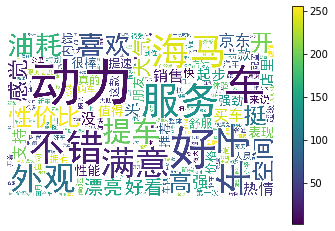

finish


In [3]:
#清洗评论数据，并用词云展示
import re
import jieba
import pandas as p
import numpy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

#读文件
file1 = open(r"H:\SVW-Data analysis PPT\scrapy_data\comm.txt", 'r')
xt = file1.read()
pattern = re.compile(r'[\u4e00-\u9fa5]+')
filedata = re.findall(pattern, xt)
xx = ''.join(filedata)
file1.close()

# 清洗数据
clear = jieba.lcut(xx)
cleared = p.DataFrame({'clear': clear})
#print(clear)
stopwords = p.read_csv("H:/text_digging/stopwords-master/stopwords-master/chineseStopWords.txt", index_col=False, quoting=3, sep="\t", names=['stopword'], encoding='GBK')
cleared = cleared[~cleared.clear.isin(stopwords.stopword)]
#print(std)
count_words=cleared.groupby(by=['clear'])['clear'].agg({"num": numpy.size})
count_words=count_words.reset_index().sort_values(by=["num"], ascending=False)
#print(count_words)
# 词云展示
wordcloud=WordCloud(font_path="C:/Windows/Fonts/simhei.ttf",background_color="white",max_font_size=250,width=1300,height=800) #指定字体类型、字体大小和字体颜色
word_frequence = {x[0]:x[1] for x in count_words.head(200).values}
wordcloud=wordcloud.fit_words(word_frequence)
plt.imshow(wordcloud)
plt.axis("off")
plt.colorbar()   #颜色条
plt.show()

#wctext = open('E:\\pachong1\\comm1.txt', 'r')
print("finish")